In [1]:
using Clapeyron,Plots
model1 = PR(["propanol","benzene"],
userlocations = (; 
Mw = [60.10,78.11], 
Tc = [536.77,562.16], 
Pc = [5137000,4880000]), 
alpha_userlocations = (; 
acentricfactor = [0.6142,0.2099]))

model2 = PCSAFT(["propanol","benzene"];userlocations=(;
Mw = [60.10,78.11],
segment = [2.9997,2.4653],
sigma = [3.2522,3.6478],
epsilon = [233.4,287.35],
n_H=[1,0],
n_e=[1,0],
epsilon_assoc = Dict((("propanol","e"),("propanol","H")) =>2276.8),
bondvol = Dict((("propanol","e"),("propanol","H")) => 0.015268)
))

model3 = SAFTVRMie(["propanol","benzene"]; userlocations=(;
Mw = [60.10,78.11],
segment = [2.2108,1.9163],
sigma = [3.6654,4.0549], 
epsilon = [345.725 357.537; 
357.537 372.59], 
lambda_a = [6.,6.],
lambda_r = [19.1302,14.798],
n_H=[1,0],
n_e=[1,0],
epsilon_assoc = Dict((("propanol","e"),("propanol","H")) =>2239.3677),
bondvol = Dict((("propanol","e"),("propanol","H")) => 9.35E-29)
))


SAFTVRMie{BasicIdeal} with 2 components:
 "propanol"
 "benzene"
Contains parameters: Mw, segment, sigma, lambda_a, lambda_r, epsilon, epsilon_assoc, bondvol

In [3]:
models=[model1,model2,model3]
T = 328.15
x = range(1e-8,1-1e-8,length=100)
X = Clapeyron.FractionVector.(x)
y = []
p = []
xexp=[1 0.9895 0.9694 0.9635 0.9486 0.9352 0.9109 0.8929 0.8676 0.8140 0.8050 0.7665 0.6659 0.5620 0.4499 0.3465 0.2557 0.1747 0.0896 0.0320 0.0079 0]

yexp=[1 0.9120 0.7831 0.7525 0.6866 0.6372 0.5652 0.5240 0.4796 0.4024 0.3873 0.3587 0.2952 0.2596 0.2260 0.1990 0.1850 0.1690 0.1272 0.0710 0.0240 0]

P=[0.15972 0.1712 0.1956 0.2023 0.2185 0.2321 0.2560 0.2720 0.2885 0.3293 0.3369 0.3576 0.3973 0.4242 0.4456 0.4633 0.4641 0.4697 0.4672 0.4636 0.4561 0.43589]


1×22 Matrix{Float64}:
 0.15972  0.1712  0.1956  0.2023  0.2185  …  0.4672  0.4636  0.4561  0.43589

In [4]:
for i ∈ 1:3
    bub = [] 
    v0=[]
    for j ∈ 1:100
        if j==1
            append!(bub, [bubble_pressure(models[i],T,X[j])])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        else
            append!(bub, [bubble_pressure(models[i],T,X[j];v0=v0)])
            v0 = [log10(bub[j][2]),log10(bub[j][3]),bub[j][4][1],bub[j][4][2]]
        end
    end
    append!(y,[append!([bub[i][4][1] for i ∈ 1:100],reverse(x))])
    append!(p,[append!([bub[i][1] for i ∈ 1:100],[bub[i][1] for i ∈ 100:-1:1])])
end


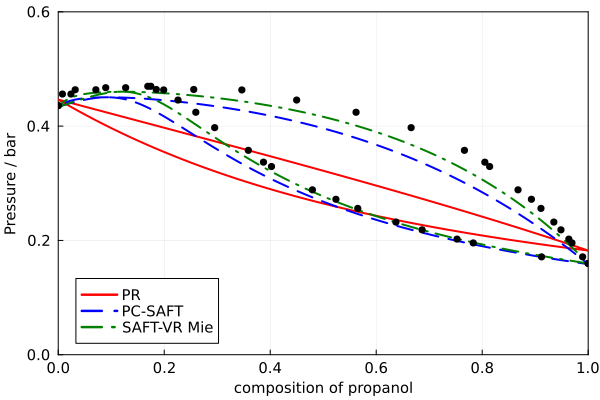

In [5]:
plot(y[1],p[1]./1e5,label="PR",linecolor=:red,linewidth=2,linestyle=:solid,legend=:bottomleft,framestyle=:box,legendfontsize=10,xlim=(0,1),ylim=(0,0.6),yticks=[0,0.2,0.4,0.6])
plot!(y[2],p[2]./1e5,label="PC-SAFT",linecolor=:blue,linewidth=2,linestyle=:dash)
plot!(y[3],p[3]./1e5,label="SAFT-VR Mie",linecolor=:green,linewidth=2,linestyle=:dashdot)
scatter!(xexp,P,label="",marker=:circle,markercolor=:black) 
scatter!(yexp,P,label="",marker=:circle,markercolor=:black) 
xlabel!("composition of propanol",xlabelfontsize=10,xtickfont = font(10))
ylabel!("Pressure / bar",ylabelfontsize=10,ytickfont = font(10))
